# Working with Convolution

In [1]:
import torch
import torch.nn as nn

In [2]:
# Define a single convolution
# kernel_size: the receptive field of the filter 
# stride: controls the stride for the cross-correlation, a single number or a tuple.
# padding: controls the amount of padding applied to the input. It can also
# be a string {'valid', 'same'} 
conv = nn.Conv2d(in_channels=3, 
                 out_channels=32,
                 kernel_size=3,
                 stride=1,
                 padding=0
                )

In [3]:
# Pass some input through the convolutional layer
x = torch.randn(1,3,128,128) # has to have 3 channels because of the in_channels value
y = conv(x)

In [4]:
# What size the output will be?
print(y.size())
# WHY?

torch.Size([1, 32, 126, 126])


To calculate the output of a convolution you can use this simple equation:
$$out\_size = [(W-K+2P)/S]+1$$
Where:
- $W$ = input size 
- $K$ = kernel size
- $P$ = padding
- $S$ = stride

In [5]:
# Therefore to mantain the same height and width:
conv = nn.Conv2d(in_channels=3, 
                 out_channels=32,
                 kernel_size=3,
                 stride=1,
                 padding=1 #!!!
                )
y = conv(x)
print(y.size())
# or:
conv = nn.Conv2d(in_channels=3, 
                 out_channels=32,
                 kernel_size=3,
                 stride=1,
                 padding='same' #!!! (only in conv with stride == 1)
                )
y = conv(x)
print(y.size())

torch.Size([1, 32, 128, 128])
torch.Size([1, 32, 128, 128])


In [6]:
# How about reducing the dimension by half?
# Two option: pooling
pool_conv = nn.Sequential(nn.Conv2d(in_channels=3, 
                         out_channels=32,
                         kernel_size=3,
                         stride=1,
                         padding=1),
                         nn.MaxPool2d(kernel_size=2)) # pooling layer: does not have learnable parameters
y = pool_conv(x)
print(y.size())
# or stride
down_conv = nn.Conv2d(in_channels=3, 
                 out_channels=32,
                 kernel_size=3,
                 stride=2, #!!!
                 padding=1 
                )
y = down_conv(x)
print(y.size())

torch.Size([1, 32, 64, 64])
torch.Size([1, 32, 64, 64])


In [7]:
# How about doubling the output size?
# Two option: upsampling
up_conv = nn.Sequential(nn.Conv2d(in_channels=3, 
                        out_channels=32,
                        kernel_size=3,
                        stride=1,
                        padding=1),
                        nn.Upsample(scale_factor=2)) # upsampling layer: does not have learnable parameters
y = up_conv(x)
print(y.size())
# or transposed convolution
tran_conv = nn.Sequential(nn.ConvTranspose2d(in_channels=3, # learn the upsampling
                         out_channels=32,
                         kernel_size=4, # !!!
                         stride=2,
                         padding=1
                        )) 
y = tran_conv(x)
print(y.size())

torch.Size([1, 32, 256, 256])
torch.Size([1, 32, 256, 256])


To calculate output size of transposed convolution the formula becomes:
$$out\_size = (W - 1)S -2P + (K - 1) + 1$$

IMPORTANT: in Generative modele it is better to use the manual upsample,
because ConvTranspose2d tends to produce checkboard artifacts!

# Working with image data

In [8]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

from PIL import Image # pip install Pillow

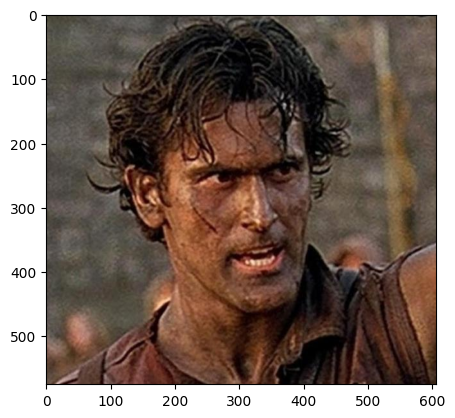

In [9]:
# Load an image
img = Image.open('res/bruce.png')
plt.imshow(img)

In [10]:
# Convert image to pytorch Tensor and resize it
# Use transforms!
transform = transforms.Compose([transforms.Resize((256,256)),
                                transforms.ToTensor(),
                                transforms.Lambda(lambda x: x[:3])]) # remove the alpha channel if present
img_tensor = transform(img)
print(img_tensor.size())
print(img_tensor.max(), img_tensor.min()) # ToTensor normalize the image between [0,1]

torch.Size([3, 256, 256])
tensor(0.9882) tensor(0.)


((0, 252), (0, 212), (0, 183))


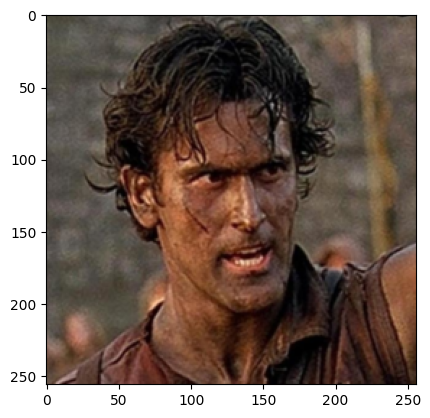

In [11]:
# Back to PIL image
to_pil = transforms.ToPILImage()
img_pil = to_pil(img_tensor) # back to values between [0,255]
print(img_pil.getextrema())
plt.imshow(img_pil)

### Data augmentation
Sometimes it is useful to artificially augment the data in order to increase the size and the diversity of images present in the dataset.

Common transfomations include:
- Resize
- Normalize
- Random Rotation
- Random Crop
- Center Crop
- Gaussian Blur
- Gray Scale

Usually <code>p</code> stands for the probability to apply a target transfomation to an image.

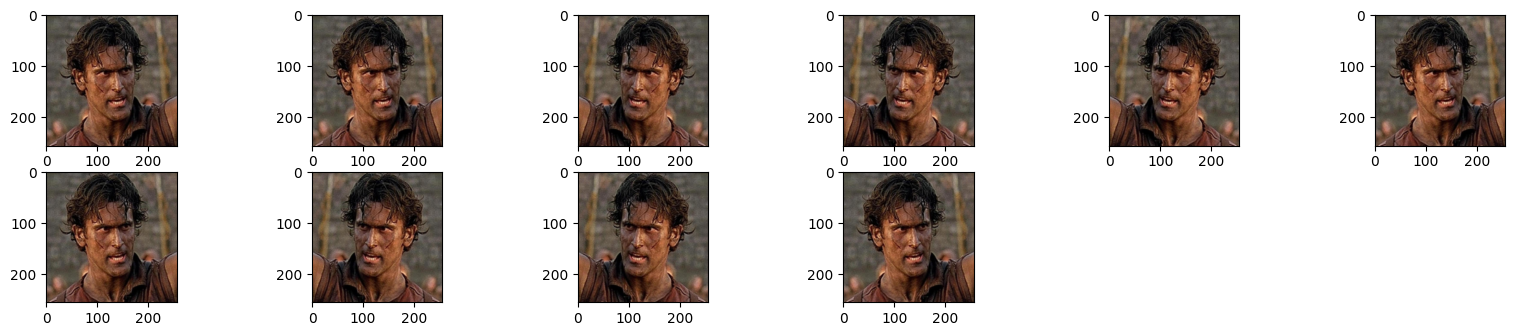

In [12]:
# Example with random horizontal flip
rhf = transforms.RandomHorizontalFlip(p=0.5)
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(10,6,i+1)
    plt.imshow(rhf(img_pil))


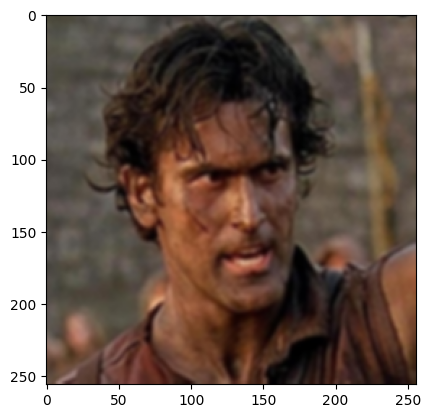

In [13]:
# Example with Gaussian Blur
gb = transforms.GaussianBlur(kernel_size=5)
plt.imshow(gb(img_pil))

### Normalization
Often the input of a CNN is normalized between [-1,+1]

In [14]:
# Normalization example
norm = transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
img_tensor_norm = norm(img_tensor)
print(img_tensor_norm.min(), img_tensor_norm.max())

tensor(-1.) tensor(0.9765)


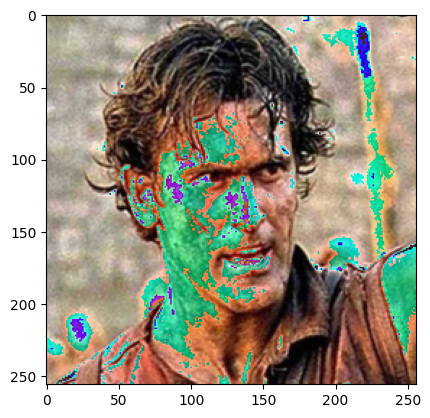

In [15]:
# If you try to visualize the normalized image it would look bad
plt.imshow(to_pil(img_tensor_norm))

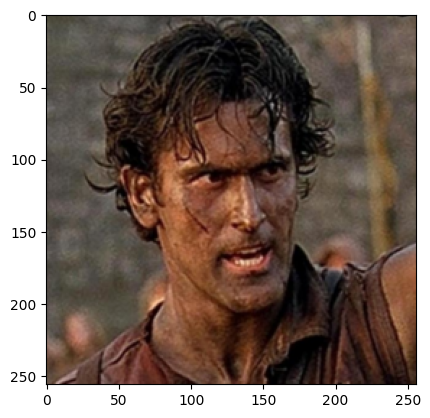

In [16]:
# Before we need to manually denormalize the image
def denorm(x):
    # Convert the range from [-1, 1] to [0, 1].
    out = (x + 1) / 2
    return out.clamp_(0, 1)

plt.imshow(to_pil(denorm(img_tensor_norm)))

In [30]:
# Ex1: load an image, resize it to (256,256), the apply the following transformation:
# random crom of (224,224), random horizontal flip with a probability of 85%,
# conversion to tensor and normalization between [-1,1]

In [31]:
# Ex2: pass the image through two convolutional layer,
# the first one has to produce an output of size (1,128,112,112),
# the second one has to produce an output of dimension (1,3,224,224)

In [32]:
# Ex3: visualize the output of the last conv layer: how does it look like?